In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
csv = pd.read_csv('Csv_cleaned (3).csv')

In [3]:
csv.columns

Index(['Unnamed: 0', 'STATION', 'DATE', 'DAILY_ENTRIES', 'day_of_week'], dtype='object')

In [37]:
csv.drop(columns="Unnamed: 0", axis=1, inplace=True)
csv

,STATION,DATE,DAILY_ENTRIES,day_of_week
0,1 AV,08/18/2019,4979.0,Sunday
1,1 AV,08/19/2019,13673.0,Monday
2,1 AV,08/20/2019,15394.0,Tuesday
3,1 AV,08/21/2019,16052.0,Wednesday
4,1 AV,08/22/2019,16145.0,Thursday
...,...,...,...,...
12845,ZEREGA AV,09/16/2019,2827.0,Monday
12846,ZEREGA AV,09/17/2019,3058.0,Tuesday
12847,ZEREGA AV,09/18/2019,3086.0,Wednesday
12848,ZEREGA AV,09/19/2019,3049.0,Thursday


In [46]:
weekends = csv[(csv['day_of_week'] == "Sunday") | (csv['day_of_week']=="Saturday")]

In [47]:
weekends

,STATION,DATE,DAILY_ENTRIES,day_of_week
0,1 AV,08/18/2019,4979.0,Sunday
6,1 AV,08/24/2019,7452.0,Saturday
7,1 AV,08/25/2019,4961.0,Sunday
13,1 AV,08/31/2019,4997.0,Saturday
14,1 AV,09/01/2019,4282.0,Sunday
...,...,...,...,...
12830,ZEREGA AV,09/01/2019,564.0,Sunday
12836,ZEREGA AV,09/07/2019,1077.0,Saturday
12837,ZEREGA AV,09/08/2019,824.0,Sunday
12843,ZEREGA AV,09/14/2019,1271.0,Saturday


In [48]:
weekdays = csv[(csv['day_of_week'] != "Sunday") & (csv['day_of_week']!="Saturday")]

In [49]:
weekday_stations = weekdays.sort_values(['DAILY_ENTRIES']).groupby(['STATION']).mean().sort_values(['DAILY_ENTRIES'], ascending=False)

In [50]:
weekday_stations.head(15)

,DAILY_ENTRIES
STATION,
34 ST-PENN STA,161249.56
GRD CNTRL-42 ST,145033.96
34 ST-HERALD SQ,119784.52
23 ST,115413.20
42 ST-PORT AUTH,100653.96
TIMES SQ-42 ST,97527.36
14 ST-UNION SQ,96344.64
FULTON ST,96259.08
86 ST,80996.96


In [51]:
weekend_stations = weekends.sort_values(['DAILY_ENTRIES']).groupby(['STATION']).mean().sort_values(['DAILY_ENTRIES'], ascending=False)

In [52]:
weekend_stations.head(15)

,DAILY_ENTRIES
STATION,
34 ST-PENN STA,75599.444444
34 ST-HERALD SQ,72411.222222
42 ST-PORT AUTH,64027.000000
14 ST-UNION SQ,60582.222222
TIMES SQ-42 ST,57041.555556
GRD CNTRL-42 ST,52099.111111
23 ST,50340.333333
125 ST,48921.555556
CANAL ST,48890.000000


In [78]:
weekend_stations.rename({"DAILY_ENTRIES" : "AVERAGE WEEKEND ENTRY RATE"}, axis=1, inplace=True)
weekday_stations.rename({"DAILY_ENTRIES" : "AVERAGE WEEKDAY ENTRY RATE"}, axis=1, inplace=True)
weekend_stations.reset_index().set_index(['STATION'], inplace=True)
weekday_stations.reset_index().set_index(['STATION'], inplace=True)

In [79]:
weekend_stations

,AVERAGE WEEKEND ENTRY RATE
STATION,
34 ST-PENN STA,75599.444444
34 ST-HERALD SQ,72411.222222
42 ST-PORT AUTH,64027.000000
14 ST-UNION SQ,60582.222222
TIMES SQ-42 ST,57041.555556
...,...
BEACH 44 ST,343.444444
TOMPKINSVILLE,162.777778
BROAD CHANNEL,133.111111


In [80]:
weekday_weekend = weekend_stations.merge(weekday_stations, on='STATION')

In [136]:
weekday_weekend["rating_value"] = weekday_weekend['AVERAGE WEEKEND ENTRY RATE'] * weekday_weekend['AVERAGE WEEKDAY ENTRY RATE'] 
best_18 = weekday_weekend.sort_values(by=['rating_value'], ascending=False).head(10).reset_index()
best_18

,STATION,AVERAGE WEEKEND ENTRY RATE,AVERAGE WEEKDAY ENTRY RATE,rating_value
0,34 ST-PENN STA,75599.444444,161249.56,1.219038e+10
1,34 ST-HERALD SQ,72411.222222,119784.52,8.673743e+09
2,GRD CNTRL-42 ST,52099.111111,145033.96,7.556140e+09
3,42 ST-PORT AUTH,64027.000000,100653.96,6.444571e+09
4,14 ST-UNION SQ,60582.222222,96344.64,5.836772e+09
5,23 ST,50340.333333,115413.20,5.809939e+09
6,TIMES SQ-42 ST,57041.555556,97527.36,5.563112e+09
7,FULTON ST,41773.666667,96259.08,4.021095e+09
8,125 ST,48921.555556,76454.36,3.740266e+09
9,CANAL ST,48890.000000,74004.64,3.618087e+09


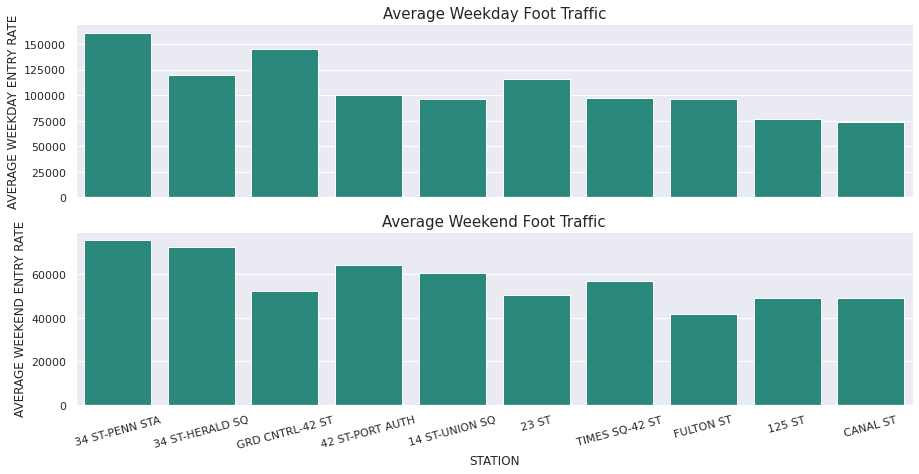

In [207]:
f, axes = plt.subplots(2,1, figsize = (15, 7))

sns.set(style="darkgrid")#, palette=sns.color_palette("1a9988", as_cmap=True))



plt.sca(axes[0])


plt.ylabel(ylabel="Average Daily Traffic")
plt.title(label="Average Weekday Foot Traffic", fontsize=15)
sns.barplot(x='STATION', y='AVERAGE WEEKDAY ENTRY RATE', data=best_18, ax=axes[0], color = '#1a9988')
plt.xticks(ticks=[])
plt.xlabel(xlabel="")


plt.sca(axes[1])
plt.ylabel(ylabel="Average Daily Traffic")
plt.title(label="Average Weekend Foot Traffic", fontsize=15)
plt.xticks(ticks = np.arange(0.5, 9.5, 1), rotation=15)

sns.barplot(x='STATION', y='AVERAGE WEEKEND ENTRY RATE', data=best_18, ax=axes[1], color = '#1a9988')

plt.savefig("Weekend_vs_Weekday.png", format = 'png')
